Importing the Dependencies

In [329]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [330]:
# loading the diabetes dataset to a pandas DataFrame
d1 = pd.read_csv('diabetes.csv')

In [331]:
# printing the first 5 rows of the dataset
d1.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [332]:
# number of rows and Columns in this dataset
d1.shape

(768, 9)

In [333]:
# getting the statistical measures of the data
d1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [334]:
d1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [335]:
d7 = d1.copy(deep = True)

In [336]:
d7[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = d7[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [337]:
d7.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [338]:
d7['Glucose'].fillna(d7['Glucose'].mean(), inplace = True)
d7['BloodPressure'].fillna(d7['BloodPressure'].mean(), inplace = True)
d7['SkinThickness'].fillna(d7['SkinThickness'].median(), inplace = True)
d7['Insulin'].fillna(d7['Insulin'].median(), inplace = True)
d7['BMI'].fillna(d7['BMI'].median(), inplace = True)

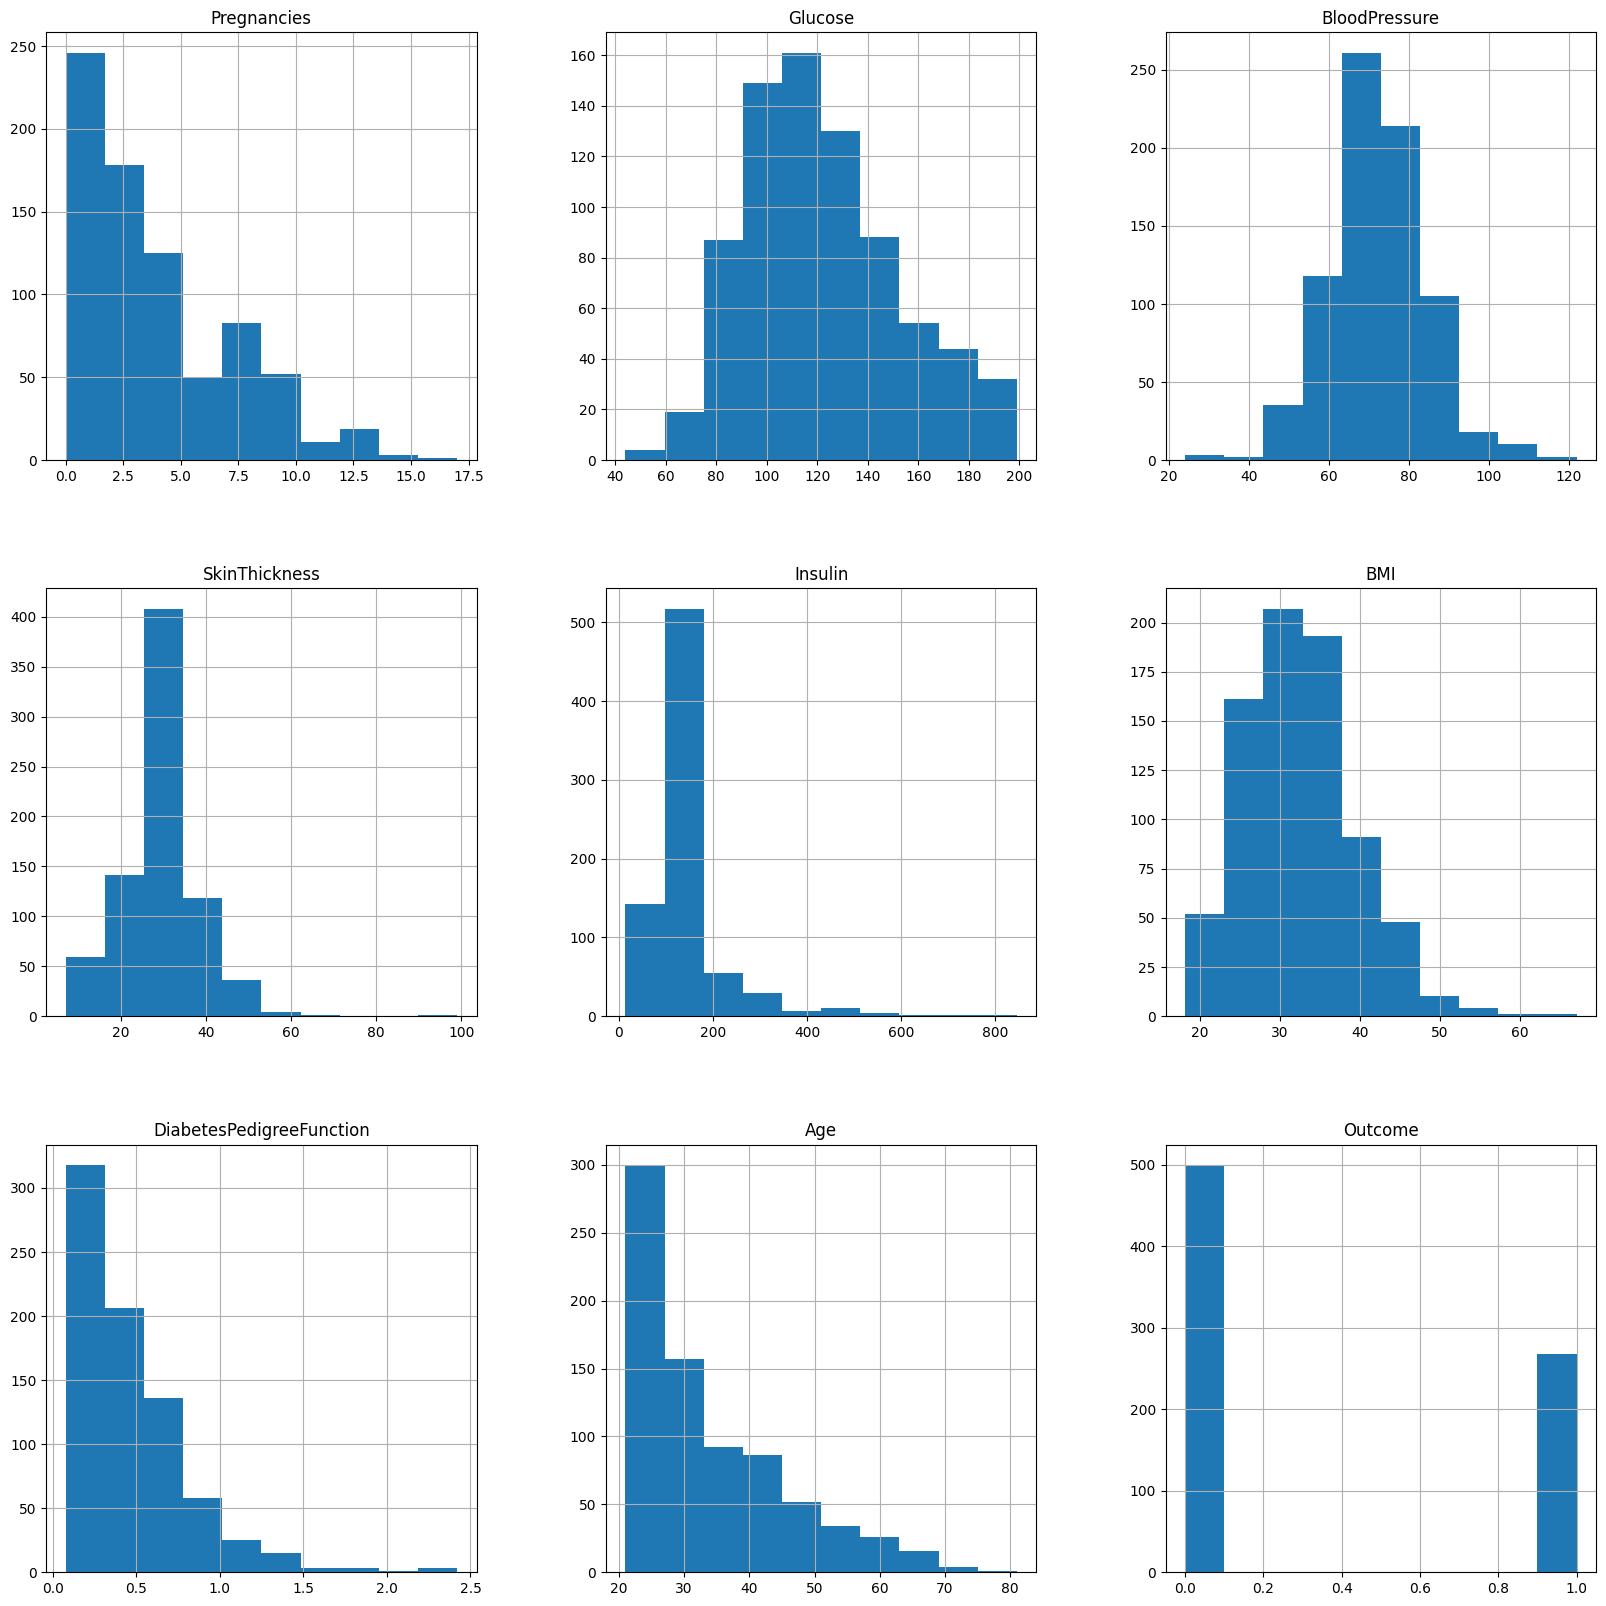

In [339]:
plot1 = d7.hist(figsize = (20,20))

In [340]:
d1[d1.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [341]:
d1['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome'>

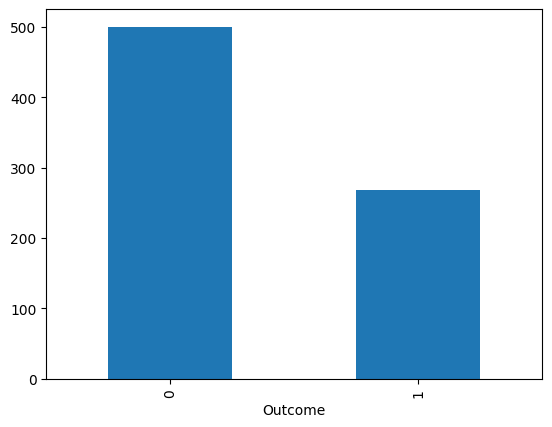

In [342]:
d1['Outcome'].value_counts().plot(kind="bar")

0 --> Non-Diabetic

1 --> Diabetic

In [343]:
import seaborn as sns
import matplotlib.pyplot as plt

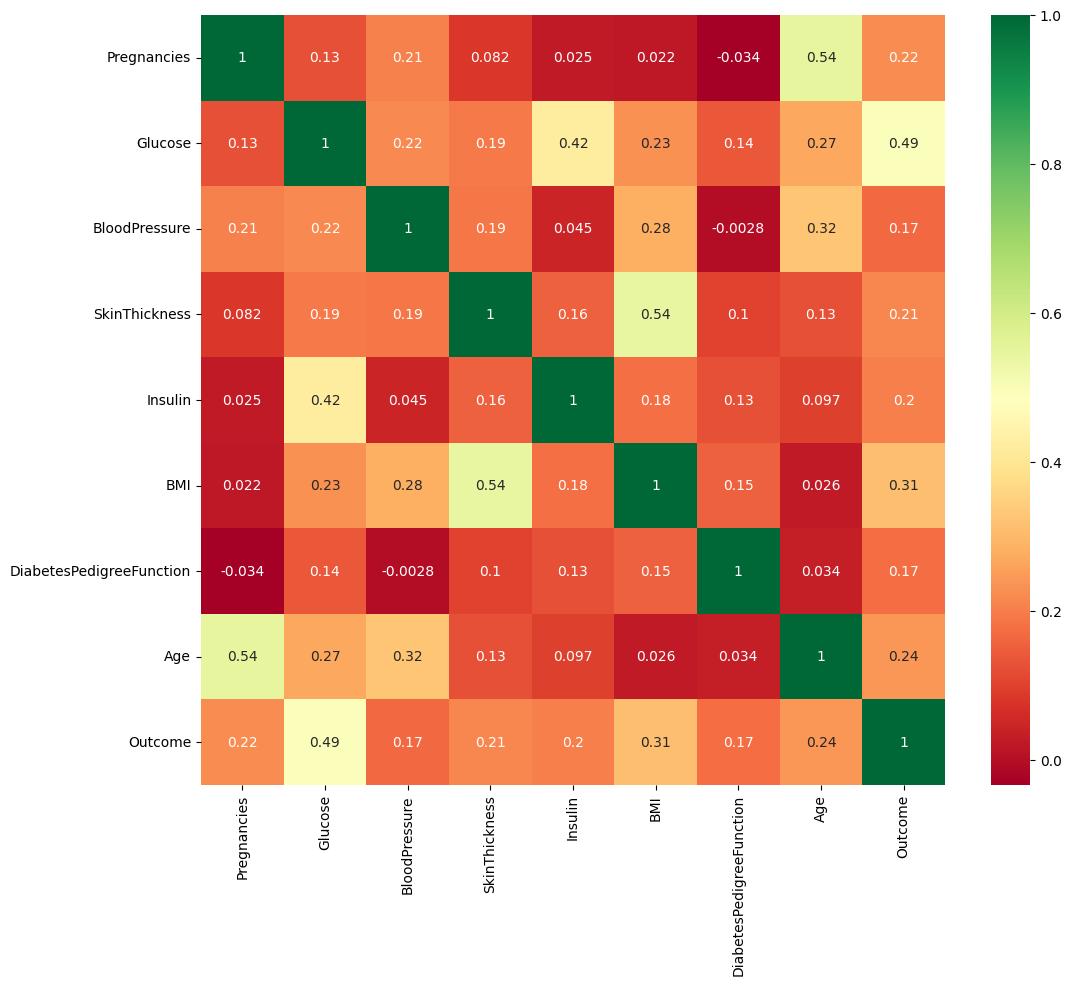

In [344]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(d7.corr(), annot=True,cmap ='RdYlGn')

In [345]:
d7.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.710121,70.935397,27.726000,127.792000,30.885600,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.686567,164.701493,35.383582,0.550500,37.067164


In [346]:
# separating the data and labels
d2 = d7.drop(columns = 'Outcome', axis= 1)
d3 = d1['Outcome']

In [347]:
d2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [348]:
d3

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

**Data Standardization**

In [349]:
scaler = StandardScaler()

In [350]:
scaler.fit(d2)

StandardScaler()

In [351]:
standardized_data = pd.DataFrame(scaler.transform(d2),columns= ['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])


In [352]:
standardized_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [353]:
d2 = standardized_data
d3 = d1['Outcome']

In [354]:
print(d3)


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [355]:
d2_train, d2_test, d3_train, d3_test = train_test_split(d2,d3, test_size = 0.2003, stratify=d3, random_state=3)

In [356]:
print(d2.shape, d2_train.shape, d2_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [357]:
classifier = svm.SVC(kernel='linear')

In [358]:
#training the support vector Machine Classifier
classifier.fit(d2_train, d3_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [359]:
# accuracy score on the training data
d2_train_prediction = classifier.predict(d2_train)
training_data_accuracy = accuracy_score(d3_train,d2_train_prediction)

In [360]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7817589576547231


In [361]:
# accuracy score on the test data
d2_test_prediction = classifier.predict(d2_test)
test_data_accuracy = accuracy_score(d2_test_prediction, d3_test)

In [362]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7532467532467533


In [363]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(d3_test, d2_test_prediction))
print(classification_report(d3_test,d2_test_prediction))

[[88 12]
 [26 28]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.70      0.52      0.60        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



In [372]:
d7.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1
767,1,93.0,70.0,31.0,125.0,30.4,0.315,23,0


Making a Predictive System

In [381]:
input1 = (1,126,60,29,125,30.1,0.349,47)

# changing the input_data to numpy array
input2_numpy_array = np.asarray(input1)

# reshape the array as we are predicting for one instance
input3_reshaped = input2_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input3_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[  0.     33.    -10.     -2.      0.     -0.3     0.034  24.   ]]
[1]
The person is diabetic


c:\Users\karti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
